### Boston 1970s housing pricing prediction
Attempt to predict the median price of homes in a given Boston suburb. Given data points about the suburb such as crime rate, local property tax rate, and so on.

Few datapoints - 404 training and 102 test samples
Each FEATURE has a different scale. Some values are proportions (0-1), others 1-12, others 0-100, etc.

In [1]:
from keras.datasets import boston_housing
# boston_housing.load_data()
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(train_targets[0:10])

Using TensorFlow backend.


(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [2]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [3]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
from sklearn.model_selection import KFold
k = 4
num_epochs = 100
all_mae_history = []
seed = 42
kfold = KFold(n_splits=k, shuffle=True, random_state=seed)
for train, test in kfold.split(train_data, train_targets):
#     print(train_data[train])
#     print(train_data[test])
    model = build_model()
    history = model.fit(train_data[train], train_targets[train], 
                        validation_data=(train_data[test], train_targets[test]),
                        epochs=num_epochs, batch_size=1)
    all_mae_history.append(history)

Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 182.8066 - mean_absolute_error: 9.9398 - val_loss: 31.9476 - val_mean_absolute_error: 4.2243
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 26.2466 - mean_absolute_error: 3.4297 - val_loss: 17.2740 - val_mean_absolute_error: 2.9616
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 21.0291 - mean_absolute_error: 2.9498 - val_loss: 13.1048 - val_mean_absolute_error: 2.4228
Epoch 4/100
303/303 [==============================] - 1s 4ms/step - loss: 17.5517 - mean_absolute_error: 2.7799 - val_loss: 12.1462 - val_mean_absolute_error: 2.4449
Epoch 5/100
303/303 [==============================] - 1s 4ms/step - loss: 15.8144 - mean_absolute_error: 2.6657 - val_loss: 11.5738 - val_mean_absolute_error: 2.4844
Epoch 6/100
303/303 [==============================] - 1s 4ms/step - loss: 13.9746 - mean_absolute_error: 2.4395 - val

Epoch 50/100
303/303 [==============================] - 1s 4ms/step - loss: 6.0648 - mean_absolute_error: 1.5879 - val_loss: 14.1065 - val_mean_absolute_error: 2.7723
Epoch 51/100
303/303 [==============================] - 1s 4ms/step - loss: 6.1046 - mean_absolute_error: 1.6447 - val_loss: 13.4456 - val_mean_absolute_error: 2.6776
Epoch 52/100
303/303 [==============================] - 1s 4ms/step - loss: 6.1620 - mean_absolute_error: 1.6407 - val_loss: 16.3602 - val_mean_absolute_error: 2.7447
Epoch 53/100
303/303 [==============================] - 1s 4ms/step - loss: 5.4624 - mean_absolute_error: 1.6036 - val_loss: 14.9146 - val_mean_absolute_error: 2.6603
Epoch 54/100
303/303 [==============================] - 1s 4ms/step - loss: 5.4419 - mean_absolute_error: 1.5492 - val_loss: 12.4225 - val_mean_absolute_error: 2.5726
Epoch 55/100
303/303 [==============================] - 1s 4ms/step - loss: 5.4895 - mean_absolute_error: 1.4953 - val_loss: 15.2707 - val_mean_absolute_error: 2.745

303/303 [==============================] - 1s 4ms/step - loss: 3.1280 - mean_absolute_error: 1.2769 - val_loss: 16.2055 - val_mean_absolute_error: 2.8060
Epoch 100/100
303/303 [==============================] - 1s 4ms/step - loss: 3.5268 - mean_absolute_error: 1.2801 - val_loss: 17.7349 - val_mean_absolute_error: 2.8590
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 211.9984 - mean_absolute_error: 10.7969 - val_loss: 45.0414 - val_mean_absolute_error: 4.4790
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 28.6005 - mean_absolute_error: 3.5889 - val_loss: 20.3591 - val_mean_absolute_error: 3.1842
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 20.5966 - mean_absolute_error: 2.9624 - val_loss: 15.8578 - val_mean_absolute_error: 2.8744
Epoch 4/100
303/303 [==============================] - 1s 4ms/step - loss: 18.3409 - mean_absolute_error: 2.7189 - val_loss: 14.9

Epoch 48/100
303/303 [==============================] - 1s 4ms/step - loss: 6.9265 - mean_absolute_error: 1.7029 - val_loss: 8.1022 - val_mean_absolute_error: 2.2511
Epoch 49/100
303/303 [==============================] - 1s 4ms/step - loss: 7.0363 - mean_absolute_error: 1.7058 - val_loss: 8.2403 - val_mean_absolute_error: 2.3755
Epoch 50/100
303/303 [==============================] - 1s 4ms/step - loss: 6.6051 - mean_absolute_error: 1.6651 - val_loss: 8.7547 - val_mean_absolute_error: 2.2833
Epoch 51/100
303/303 [==============================] - 1s 4ms/step - loss: 6.6694 - mean_absolute_error: 1.7018 - val_loss: 7.9330 - val_mean_absolute_error: 2.2820
Epoch 52/100
303/303 [==============================] - 1s 4ms/step - loss: 6.9471 - mean_absolute_error: 1.6485 - val_loss: 8.8113 - val_mean_absolute_error: 2.4607
Epoch 53/100
303/303 [==============================] - 1s 4ms/step - loss: 6.3682 - mean_absolute_error: 1.6244 - val_loss: 7.8778 - val_mean_absolute_error: 2.1987
Epoc

303/303 [==============================] - 1s 4ms/step - loss: 4.6415 - mean_absolute_error: 1.4079 - val_loss: 12.9762 - val_mean_absolute_error: 2.8021
Epoch 98/100
303/303 [==============================] - 1s 4ms/step - loss: 4.3857 - mean_absolute_error: 1.3606 - val_loss: 8.9885 - val_mean_absolute_error: 2.3537
Epoch 99/100
303/303 [==============================] - 1s 4ms/step - loss: 4.5625 - mean_absolute_error: 1.3663 - val_loss: 9.9984 - val_mean_absolute_error: 2.5425
Epoch 100/100
303/303 [==============================] - 1s 4ms/step - loss: 4.5290 - mean_absolute_error: 1.3823 - val_loss: 10.4469 - val_mean_absolute_error: 2.4867
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 191.1857 - mean_absolute_error: 10.8496 - val_loss: 49.1584 - val_mean_absolute_error: 4.4670
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 23.5271 - mean_absolute_error: 3.4902 - val_loss: 37.526

Epoch 46/100
303/303 [==============================] - 1s 4ms/step - loss: 4.0487 - mean_absolute_error: 1.4364 - val_loss: 24.1834 - val_mean_absolute_error: 2.9374
Epoch 47/100
303/303 [==============================] - 1s 4ms/step - loss: 4.1568 - mean_absolute_error: 1.4335 - val_loss: 25.3692 - val_mean_absolute_error: 2.8681
Epoch 48/100
303/303 [==============================] - 1s 4ms/step - loss: 3.6880 - mean_absolute_error: 1.4575 - val_loss: 31.9943 - val_mean_absolute_error: 3.5603
Epoch 49/100
303/303 [==============================] - 1s 4ms/step - loss: 4.0072 - mean_absolute_error: 1.4547 - val_loss: 24.9825 - val_mean_absolute_error: 2.9883
Epoch 50/100
303/303 [==============================] - 1s 4ms/step - loss: 3.8415 - mean_absolute_error: 1.4391 - val_loss: 24.9563 - val_mean_absolute_error: 3.0278
Epoch 51/100
303/303 [==============================] - 1s 4ms/step - loss: 3.9485 - mean_absolute_error: 1.4008 - val_loss: 22.9498 - val_mean_absolute_error: 2.809

Epoch 95/100
303/303 [==============================] - 1s 4ms/step - loss: 2.7833 - mean_absolute_error: 1.1983 - val_loss: 22.2032 - val_mean_absolute_error: 2.8322
Epoch 96/100
303/303 [==============================] - 1s 4ms/step - loss: 2.5890 - mean_absolute_error: 1.1581 - val_loss: 22.3761 - val_mean_absolute_error: 2.8762
Epoch 97/100
303/303 [==============================] - 1s 4ms/step - loss: 2.6693 - mean_absolute_error: 1.1571 - val_loss: 23.4917 - val_mean_absolute_error: 2.9499
Epoch 98/100
303/303 [==============================] - 1s 4ms/step - loss: 2.8435 - mean_absolute_error: 1.2169 - val_loss: 23.2689 - val_mean_absolute_error: 2.8722
Epoch 99/100
303/303 [==============================] - 1s 4ms/step - loss: 2.7201 - mean_absolute_error: 1.1869 - val_loss: 24.1205 - val_mean_absolute_error: 2.9447
Epoch 100/100
303/303 [==============================] - 1s 4ms/step - loss: 2.7202 - mean_absolute_error: 1.1322 - val_loss: 23.7273 - val_mean_absolute_error: 2.85

303/303 [==============================] - ETA: 0s - loss: 6.5504 - mean_absolute_error: 1.669 - 1s 4ms/step - loss: 6.4533 - mean_absolute_error: 1.6645 - val_loss: 10.1432 - val_mean_absolute_error: 2.4887
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 6.2941 - mean_absolute_error: 1.5148 - val_loss: 8.3700 - val_mean_absolute_error: 2.2276
Epoch 45/100
303/303 [==============================] - 1s 4ms/step - loss: 6.7140 - mean_absolute_error: 1.5941 - val_loss: 8.9867 - val_mean_absolute_error: 2.2870
Epoch 46/100
303/303 [==============================] - 1s 4ms/step - loss: 6.4253 - mean_absolute_error: 1.6280 - val_loss: 8.5839 - val_mean_absolute_error: 2.2340
Epoch 47/100
303/303 [==============================] - 1s 4ms/step - loss: 6.3638 - mean_absolute_error: 1.6301 - val_loss: 9.9462 - val_mean_absolute_error: 2.3913
Epoch 48/100
303/303 [==============================] - 1s 4ms/step - loss: 6.0953 - mean_absolute_error: 1.5533 - val_loss: 9.5

Epoch 92/100
303/303 [==============================] - 1s 4ms/step - loss: 3.8457 - mean_absolute_error: 1.2710 - val_loss: 8.7310 - val_mean_absolute_error: 2.2409
Epoch 93/100
303/303 [==============================] - 1s 4ms/step - loss: 3.7058 - mean_absolute_error: 1.2523 - val_loss: 8.2948 - val_mean_absolute_error: 2.1786
Epoch 94/100
303/303 [==============================] - 1s 4ms/step - loss: 3.5333 - mean_absolute_error: 1.2330 - val_loss: 9.0269 - val_mean_absolute_error: 2.3388
Epoch 95/100
303/303 [==============================] - 1s 4ms/step - loss: 3.8362 - mean_absolute_error: 1.2855 - val_loss: 8.9046 - val_mean_absolute_error: 2.2623
Epoch 96/100
303/303 [==============================] - 1s 4ms/step - loss: 3.9839 - mean_absolute_error: 1.3282 - val_loss: 8.5906 - val_mean_absolute_error: 2.2461
Epoch 97/100
303/303 [==============================] - 1s 4ms/step - loss: 3.6210 - mean_absolute_error: 1.2338 - val_loss: 9.4395 - val_mean_absolute_error: 2.3498
Epoc

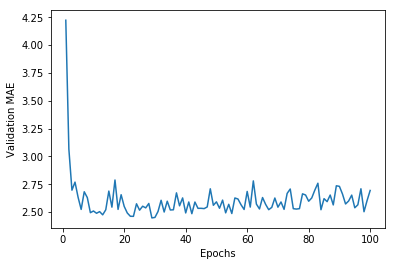

In [16]:
average_mae_history = [np.mean([x.history['val_mean_absolute_error'][i] for x in all_mae_history]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

Epoch 1/80
404/404 [==============================] - 0s 1ms/step - loss: 507.6796 - mean_absolute_error: 20.6717
Epoch 2/80
404/404 [==============================] - 0s 266us/step - loss: 344.5574 - mean_absolute_error: 16.3153
Epoch 3/80
404/404 [==============================] - 0s 282us/step - loss: 176.4121 - mean_absolute_error: 10.8657
Epoch 4/80
404/404 [==============================] - 0s 279us/step - loss: 75.6837 - mean_absolute_error: 6.5737
Epoch 5/80
404/404 [==============================] - 0s 250us/step - loss: 44.2841 - mean_absolute_error: 4.7692
Epoch 6/80
404/404 [==============================] - 0s 280us/step - loss: 32.1726 - mean_absolute_error: 3.9780
Epoch 7/80
404/404 [==============================] - 0s 267us/step - loss: 26.4998 - mean_absolute_error: 3.5782
Epoch 8/80
404/404 [==============================] - 0s 275us/step - loss: 22.7738 - mean_absolute_error: 3.2543
Epoch 9/80
404/404 [==============================] - 0s 272us/step - loss: 20.9233 

404/404 [==============================] - 0s 265us/step - loss: 6.2887 - mean_absolute_error: 1.7767
Epoch 73/80
404/404 [==============================] - 0s 260us/step - loss: 6.4295 - mean_absolute_error: 1.7812
Epoch 74/80
404/404 [==============================] - 0s 261us/step - loss: 6.4653 - mean_absolute_error: 1.7930
Epoch 75/80
404/404 [==============================] - 0s 258us/step - loss: 6.3843 - mean_absolute_error: 1.7846
Epoch 76/80
404/404 [==============================] - 0s 290us/step - loss: 6.2403 - mean_absolute_error: 1.7610
Epoch 77/80
404/404 [==============================] - 0s 271us/step - loss: 6.2900 - mean_absolute_error: 1.7701
Epoch 78/80
404/404 [==============================] - 0s 248us/step - loss: 6.2513 - mean_absolute_error: 1.7851
Epoch 79/80
404/404 [==============================] - 0s 268us/step - loss: 6.3144 - mean_absolute_error: 1.7812
Epoch 80/80
102/102 [==============================] - 0s 1ms/step


2.6881642154618803